<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [19]:
# STEP 1: Reload the data
import pandas as pd

data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# STEP 2: Check that it’s loaded
print(df.shape)  # Should return (65437, 114)
print(df[['Country', 'LanguageHaveWorkedWith']].dropna().head())


(65437, 114)
                                             Country  \
1  United Kingdom of Great Britain and Northern I...   
2  United Kingdom of Great Britain and Northern I...   
3                                             Canada   
4                                             Norway   
5                           United States of America   

                              LanguageHaveWorkedWith  
1  Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...  
2                                                 C#  
3  C;C++;HTML/CSS;Java;JavaScript;PHP;PowerShell;...  
4            C++;HTML/CSS;JavaScript;Lua;Python;Rust  
5  Bash/Shell (all shells);HTML/CSS;Java;JavaScri...  


#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [20]:
# STEP 1: Check missing values in the critical columns
missing_values = df[['Employment', 'JobSat', 'RemoteWork']].isnull().sum()
print("Missing values before handling:\n")
print(missing_values)

# STEP 2: Drop rows with missing 'Employment' (critical for segmentation)
df = df.dropna(subset=['Employment'])

# STEP 3: Fill missing 'JobSat' with the mode (most common value)
df['JobSat'] = df['JobSat'].fillna(df['JobSat'].mode()[0])

# STEP 4: Fill missing 'RemoteWork' with the mode
df['RemoteWork'] = df['RemoteWork'].fillna(df['RemoteWork'].mode()[0])

# STEP 5: Verify after handling
missing_after = df[['Employment', 'JobSat', 'RemoteWork']].isnull().sum()
print("\nMissing values after handling:\n")
print(missing_after)


Missing values before handling:

Employment        0
JobSat        36311
RemoteWork    10631
dtype: int64

Missing values after handling:

Employment    0
JobSat        0
RemoteWork    0
dtype: int64


#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


/tmp/ipykernel_1484/548107268.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=median_scores, x='ExperienceRange', y='JobSatScore', palette='Blues_d')


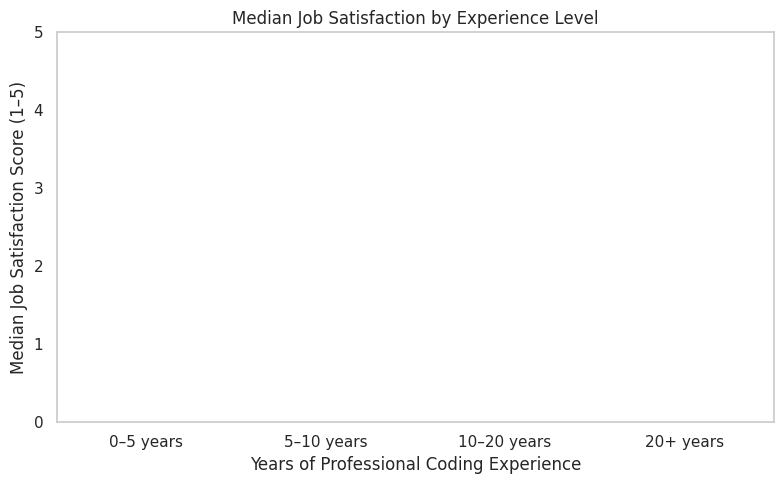

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# STEP 1: Helper function to convert strings to numeric values
def convert_years(x):
    if pd.isnull(x):
        return np.nan
    elif x == 'Less than 1 year':
        return 0.5
    elif x == 'More than 50 years':
        return 51
    else:
        try:
            return float(x)
        except:
            return np.nan

# STEP 2: Apply conversion to 'YearsCodePro'
df['YearsCodePro_Num'] = df['YearsCodePro'].apply(convert_years)

# STEP 3: Map JobSat to numeric scores
job_sat_map = {
    'Very dissatisfied': 1,
    'Slightly dissatisfied': 2,
    'Neither satisfied nor dissatisfied': 3,
    'Slightly satisfied': 4,
    'Very satisfied': 5
}
df['JobSatScore'] = df['JobSat'].map(job_sat_map)

# STEP 4: Define experience ranges
bins = [0, 5, 10, 20, np.inf]
labels = ['0–5 years', '5–10 years', '10–20 years', '20+ years']
df['ExperienceRange'] = pd.cut(df['YearsCodePro_Num'], bins=bins, labels=labels, right=False)

# STEP 5: Group by experience range and compute median satisfaction
median_scores = df.groupby('ExperienceRange', observed=True)['JobSatScore'].median().reset_index()

# STEP 6: Plot the result
plt.figure(figsize=(8, 5))
sns.barplot(data=median_scores, x='ExperienceRange', y='JobSatScore', palette='Blues_d')
plt.title('Median Job Satisfaction by Experience Level')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Median Job Satisfaction Score (1–5)')
plt.ylim(0, 5)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


/tmp/ipykernel_1484/645852815.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_job_sat, y='JobSat', order=job_sat_order, palette='coolwarm')


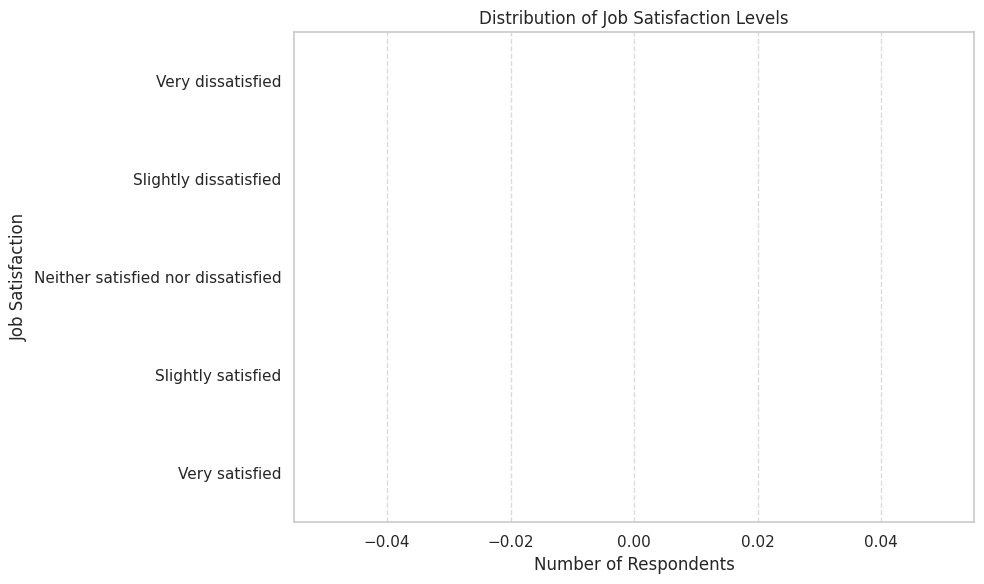

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure consistent order of satisfaction levels
job_sat_order = [
    'Very dissatisfied',
    'Slightly dissatisfied',
    'Neither satisfied nor dissatisfied',
    'Slightly satisfied',
    'Very satisfied'
]

# Drop missing JobSat values to avoid plotting NaNs
df_job_sat = df[df['JobSat'].notna()]

# Plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df_job_sat, y='JobSat', order=job_sat_order, palette='coolwarm')
plt.title('Distribution of Job Satisfaction Levels')
plt.xlabel('Number of Respondents')
plt.ylabel('Job Satisfaction')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


/tmp/ipykernel_1484/761127650.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_remote, x='RemoteWork', palette='Set2')


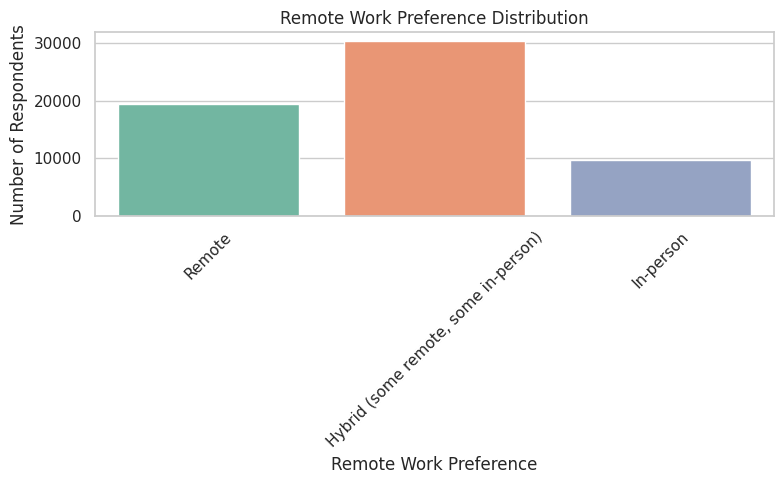

📋 Remote Work Preferences by Employment Type:

RemoteWork                                          Hybrid (some remote, some in-person)  \
Employment                                                                                 
Employed, full-time                                                                15992   
Employed, full-time;Employed, part-time                                               77   
Employed, full-time;Independent contractor, fre...                                  1219   
Employed, full-time;Independent contractor, fre...                                    68   
Employed, full-time;Independent contractor, fre...                                     0   
...                                                                                  ...   
Student, full-time;Student, part-time;Employed,...                                     4   
Student, full-time;Student, part-time;Retired                                          2   
Student, part-time               

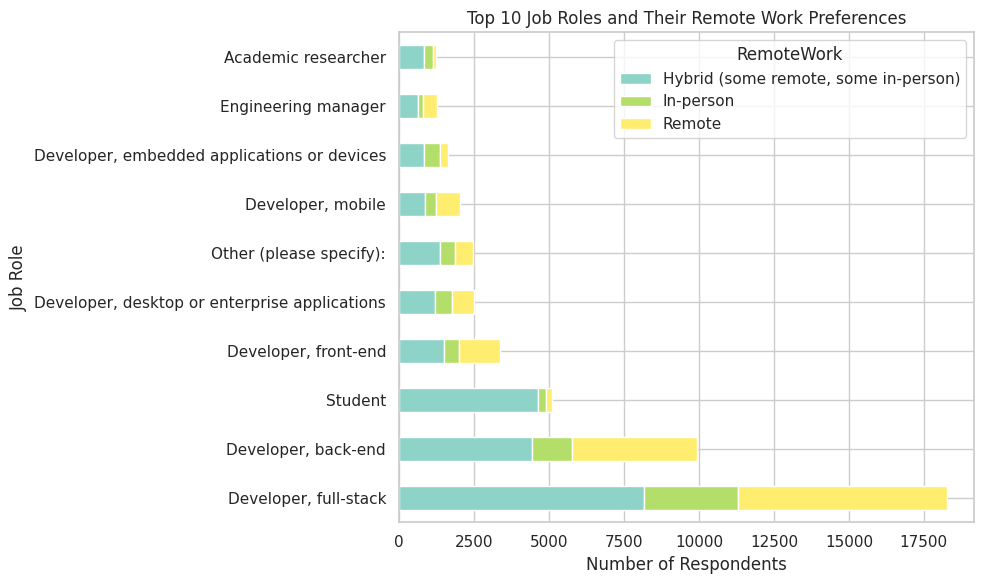

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop rows with missing RemoteWork or Employment or DevType values
df_remote = df[['RemoteWork', 'Employment', 'DevType']].dropna()

# --- 📊 Count plot for RemoteWork distribution ---
plt.figure(figsize=(8, 5))
sns.countplot(data=df_remote, x='RemoteWork', palette='Set2')
plt.title('Remote Work Preference Distribution')
plt.xlabel('Remote Work Preference')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- 📈 Cross-tab: RemoteWork vs. Employment ---
remote_by_employment = pd.crosstab(df_remote['Employment'], df_remote['RemoteWork'])
print("📋 Remote Work Preferences by Employment Type:\n")
print(remote_by_employment)

# --- 🧑‍💻 DevType may contain multiple roles separated by semicolons, so split and explode ---
df_remote_exploded = df_remote.copy()
df_remote_exploded['DevType'] = df_remote_exploded['DevType'].str.split(';')
df_remote_exploded = df_remote_exploded.explode('DevType')

# --- 📈 Cross-tab: RemoteWork vs. Job Role (DevType) ---
remote_by_role = pd.crosstab(df_remote_exploded['DevType'], df_remote_exploded['RemoteWork'])
print("\n📋 Remote Work Preferences by Job Role:\n")
print(remote_by_role)

# --- 🔍 Optional: Visualize top job roles and their remote work preferences ---
top_roles = remote_by_role.sum(axis=1).sort_values(ascending=False).head(10).index
filtered_remote_by_role = remote_by_role.loc[top_roles]

# Stacked bar chart
filtered_remote_by_role.plot(kind='barh', stacked=True, figsize=(10, 6), colormap='Set3')
plt.title('Top 10 Job Roles and Their Remote Work Preferences')
plt.xlabel('Number of Respondents')
plt.ylabel('Job Role')
plt.tight_layout()
plt.show()


#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


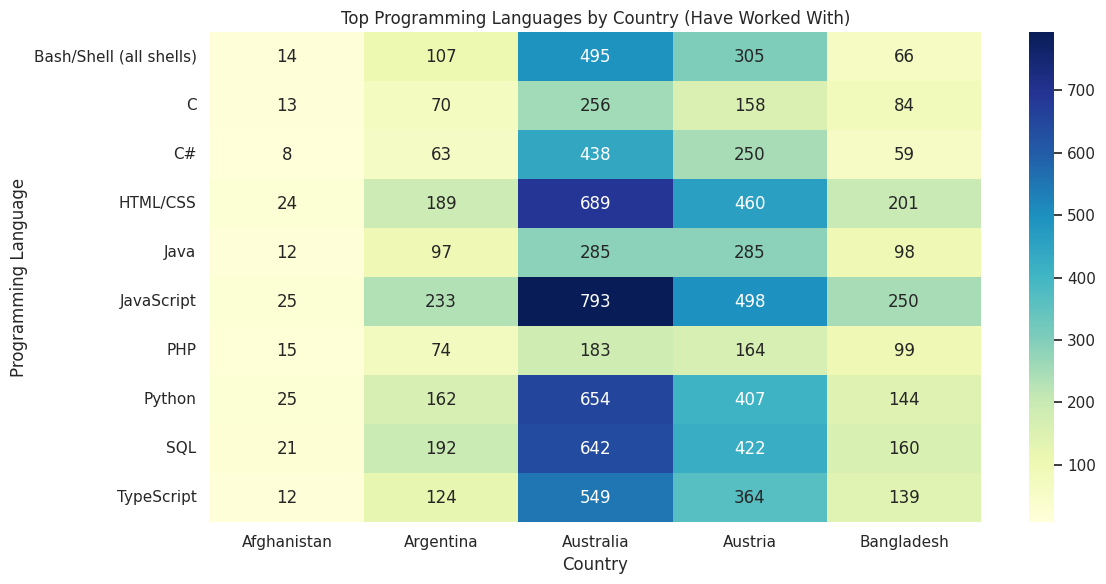

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# STEP 1: Reload relevant columns
df_lang = df[['Country', 'LanguageHaveWorkedWith']].dropna()

# STEP 2: Split multiple languages into rows
df_lang['LanguageHaveWorkedWith'] = df_lang['LanguageHaveWorkedWith'].str.split(';')
df_lang_exploded = df_lang.explode('LanguageHaveWorkedWith')

# STEP 3: Count languages per country
lang_counts = df_lang_exploded.groupby(['Country', 'LanguageHaveWorkedWith']).size().reset_index(name='Count')

# STEP 4: Get top countries and top languages
top_countries = lang_counts['Country'].value_counts().head(5).index.tolist()
top_languages = lang_counts['LanguageHaveWorkedWith'].value_counts().head(10).index.tolist()

# STEP 5: Filter only top countries & languages
filtered_lang = lang_counts[
    (lang_counts['Country'].isin(top_countries)) &
    (lang_counts['LanguageHaveWorkedWith'].isin(top_languages))
]

# Pivot table for heatmap: rows=Languages, columns=Countries
heatmap_data = filtered_lang.pivot(index='LanguageHaveWorkedWith', columns='Country', values='Count').fillna(0)

# STEP 6: Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, fmt='g', cmap='YlGnBu')
plt.title('Top Programming Languages by Country (Have Worked With)')
plt.xlabel('Country')
plt.ylabel('Programming Language')
plt.tight_layout()
plt.show()


#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


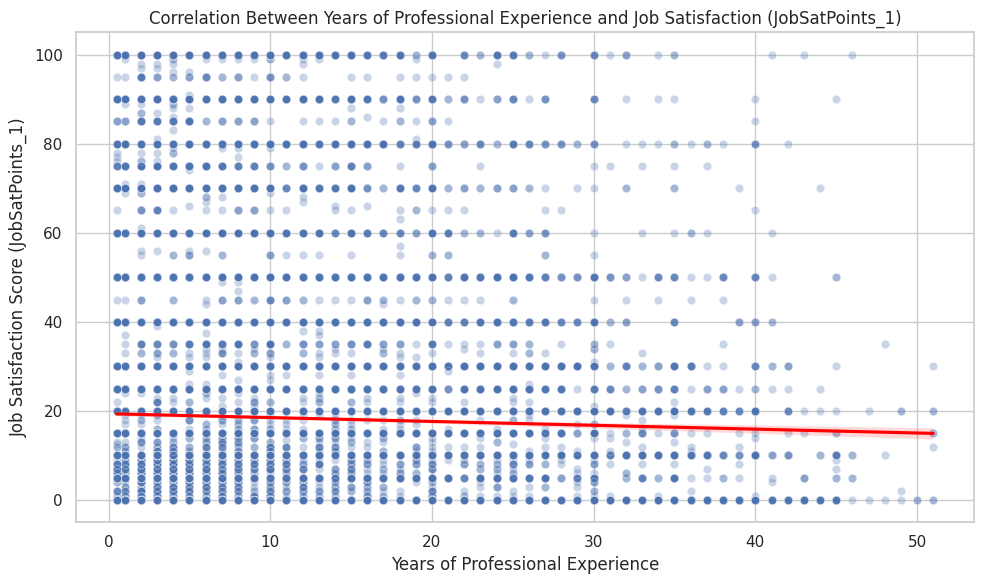

In [25]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# STEP 1: Convert YearsCodePro to numeric
def convert_years(value):
    if pd.isna(value):
        return None
    elif value == "Less than 1 year":
        return 0.5
    elif value == "More than 50 years":
        return 51
    try:
        return float(value)
    except:
        return None

df['YearsCodePro_Num'] = df['YearsCodePro'].apply(convert_years)

# STEP 2: Drop rows with missing values in required columns
df_corr = df[['YearsCodePro_Num', 'JobSatPoints_1']].dropna()

# STEP 3: Scatter plot to visualize correlation
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_corr, x='YearsCodePro_Num', y='JobSatPoints_1', alpha=0.3)
sns.regplot(data=df_corr, x='YearsCodePro_Num', y='JobSatPoints_1', scatter=False, color='red')
plt.title('Correlation Between Years of Professional Experience and Job Satisfaction (JobSatPoints_1)')
plt.xlabel('Years of Professional Experience')
plt.ylabel('Job Satisfaction Score (JobSatPoints_1)')
plt.grid(True)
plt.tight_layout()
plt.show()


#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


📋 Cross-tabulation of Education Level and Employment Type:

Employment                                          Employed, full-time  \
EdLevel                                                                   
Associate degree (A.A., A.S., etc.)                                1059   
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                      16806   
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                   11011   
Primary/elementary school                                           160   
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                     2073   
Secondary school (e.g. American high school, Ge...                 1460   
Some college/university study without earning a...                 3579   
Something else                                                      377   

Employment                                          Employed, full-time;Employed, part-time  \
EdLevel                                                                                       

/tmp/ipykernel_1484/2670846511.py:27: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


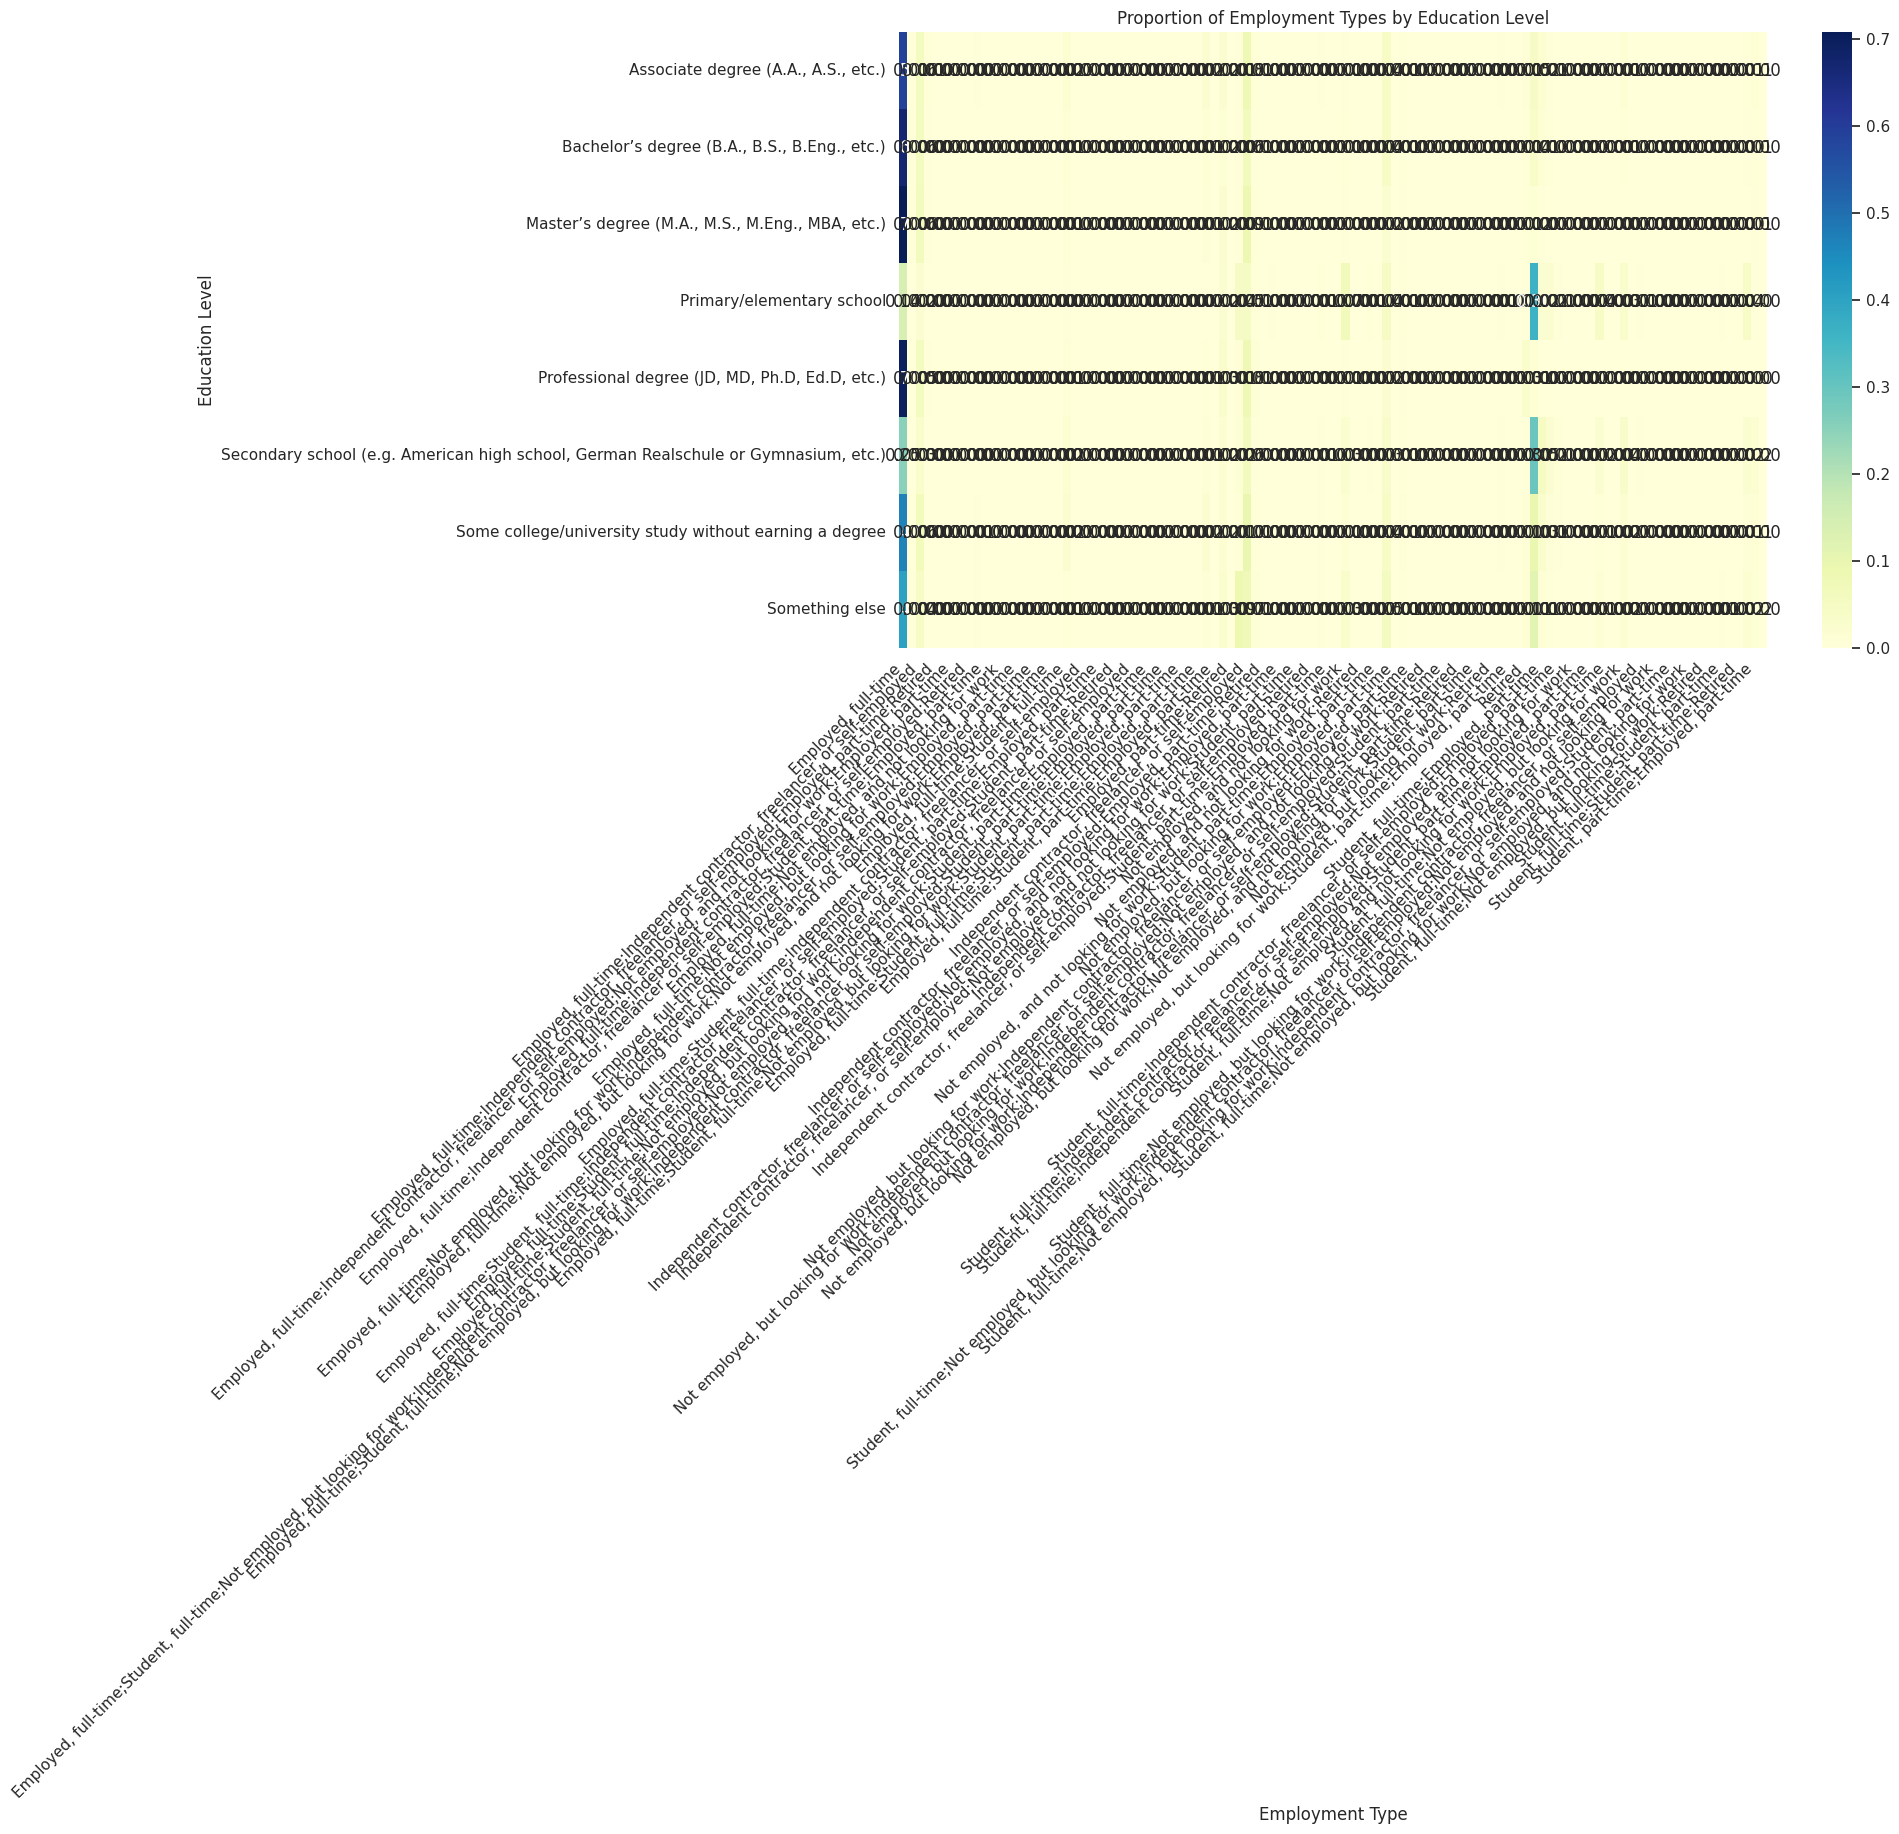

In [26]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# STEP 1: Filter and drop missing values
df_edu_emp = df[['EdLevel', 'Employment']].dropna()

# STEP 2: Cross-tabulation
edu_emp_ct = pd.crosstab(df_edu_emp['EdLevel'], df_edu_emp['Employment'])

# Display the cross-tab
print("📋 Cross-tabulation of Education Level and Employment Type:\n")
print(edu_emp_ct)

# STEP 3: Normalize by row to get proportions
edu_emp_prop = edu_emp_ct.div(edu_emp_ct.sum(axis=1), axis=0)

# STEP 4: Plot heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(edu_emp_prop, annot=True, fmt='.2f', cmap='YlGnBu')
plt.title('Proportion of Employment Types by Education Level')
plt.ylabel('Education Level')
plt.xlabel('Employment Type')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [ ]:
## Write your code here

<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
